In [165]:
#reading in excel file
import pandas as pd
data = pd.read_excel('/Users/lukelambert/Desktop/NCAA_XC.xlsx', sheet_name=None)

df = data['Women 2018']
print(df.columns)


Index(['placement', 'name', 'time', 'team', 'year', 'race1 name',
       'placement.1', 'time.1', 'race2 name', 'placement.2', 'time.2',
       'race 3name', 'placement.3', 'time.3', 'conference', 'placement.4',
       'time.4', 'region', 'placement.5', 'time.5', 'prior NCAA place',
       'time.6'],
      dtype='object')


In [166]:
#renaming columns
keep = ['placement', 'name', 'time', 'team', 'year', 'conference', 'placement.4', 'region', 'placement.5', 'prior NCAA place']
df = df[keep]
temp = df.rename(columns={'placement': 'ncaaPlace', 'placement.4': 'conferencePlace', 'placement.5': 'regionPlace', 'prior NCAA place': 'ncaaPriorPlace', 'time': 'ncaaTime'}, inplace=False)
df = temp

In [167]:
#fixing the placement columns
import numpy as np
import re

df.fillna('n/a', inplace=True)
def ordinal_to_int(ordinal_str):
    if ordinal_str == 'n/a':
        return np.nan
    return int(''.join(filter(str.isdigit, ordinal_str)))

df['conferencePlace'] = df['conferencePlace'].apply(ordinal_to_int)
df['regionPlace'] = df['regionPlace'].apply(ordinal_to_int)
df['ncaaPriorPlace'] = df['ncaaPriorPlace'].apply(ordinal_to_int)

print(len(df))

255


90
255


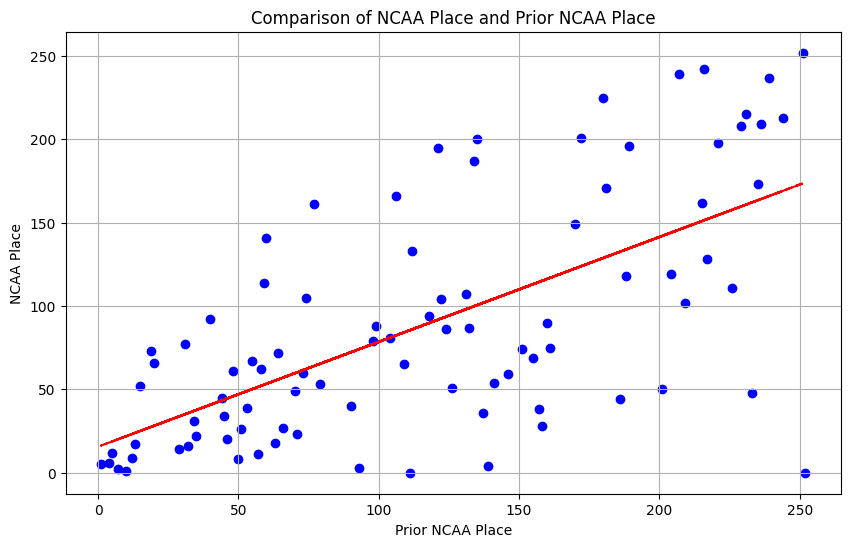

In [168]:
#comparison of NCAA Place and Prior NCAA Place

import matplotlib.pyplot as plt
import numpy as np


filtered_df = df.copy()
filtered_df.dropna(subset=['ncaaPlace', 'ncaaPriorPlace'], inplace=True)
filtered_df = filtered_df[filtered_df['ncaaPlace'] != 'DNF']

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['ncaaPriorPlace'], filtered_df['ncaaPlace'], color='blue')

plt.xlabel('Prior NCAA Place')
plt.ylabel('NCAA Place')
plt.title('Comparison of NCAA Place and Prior NCAA Place')
plt.grid(True)

print(len(filtered_df))
print(len(df))

# Compute the best fit line (least squares regression)
slope, intercept = np.polyfit(filtered_df['ncaaPriorPlace'], filtered_df['ncaaPlace'], 1)
regression_line = slope * filtered_df['ncaaPriorPlace'] + intercept

# Plot the regression line
plt.plot(filtered_df['ncaaPriorPlace'], regression_line, color='red', linestyle='--')

plt.show()

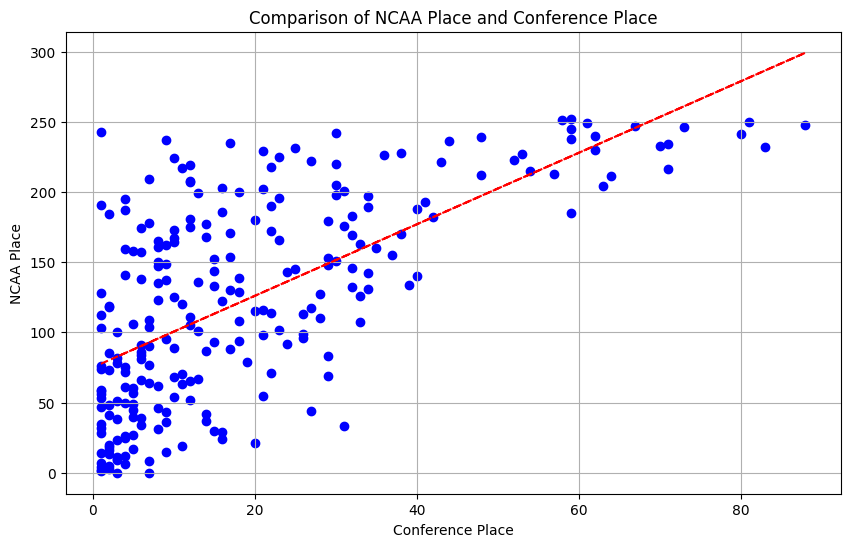

In [172]:
filtered_df = df.copy()
filtered_df.dropna(subset=['ncaaPlace', 'conferencePlace'], inplace=True)
filtered_df = filtered_df[filtered_df['ncaaPlace'] != 'DNF']


plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['conferencePlace'], filtered_df['ncaaPlace'], color='blue')

plt.xlabel('Conference Place')
plt.ylabel('NCAA Place')
plt.title('Comparison of NCAA Place and Conference Place')
plt.grid(True)

# Compute the best fit line (least squares regression)
slope, intercept = np.polyfit(filtered_df['conferencePlace'], filtered_df['ncaaPlace'], 1)
regression_line = slope * filtered_df['conferencePlace'] + intercept

# Plot the regression line
plt.plot(filtered_df['conferencePlace'], regression_line, color='red', linestyle='--')

plt.show()

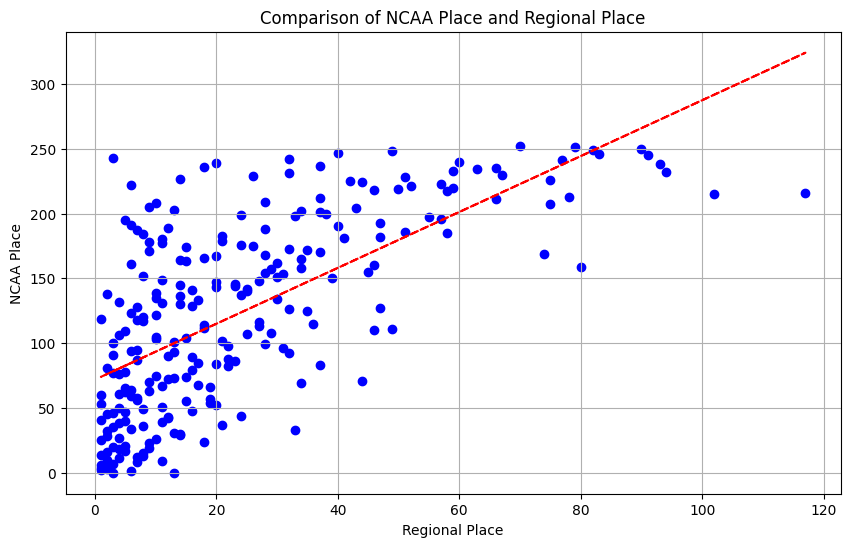

In [174]:
filtered_df = df.copy()
filtered_df.dropna(subset=['ncaaPlace', 'regionPlace'], inplace=True)
filtered_df = filtered_df[filtered_df['ncaaPlace'] != 'DNF']


plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['regionPlace'], filtered_df['ncaaPlace'], color='blue')

plt.xlabel('Regional Place')
plt.ylabel('NCAA Place')
plt.title('Comparison of NCAA Place and Regional Place')
plt.grid(True)


# Compute the best fit line (least squares regression)
slope, intercept = np.polyfit(filtered_df['regionPlace'], filtered_df['ncaaPlace'], 1)
regression_line = slope * filtered_df['regionPlace'] + intercept

# Plot the regression line
plt.plot(filtered_df['regionPlace'], regression_line, color='red', linestyle='--')

plt.show()

242


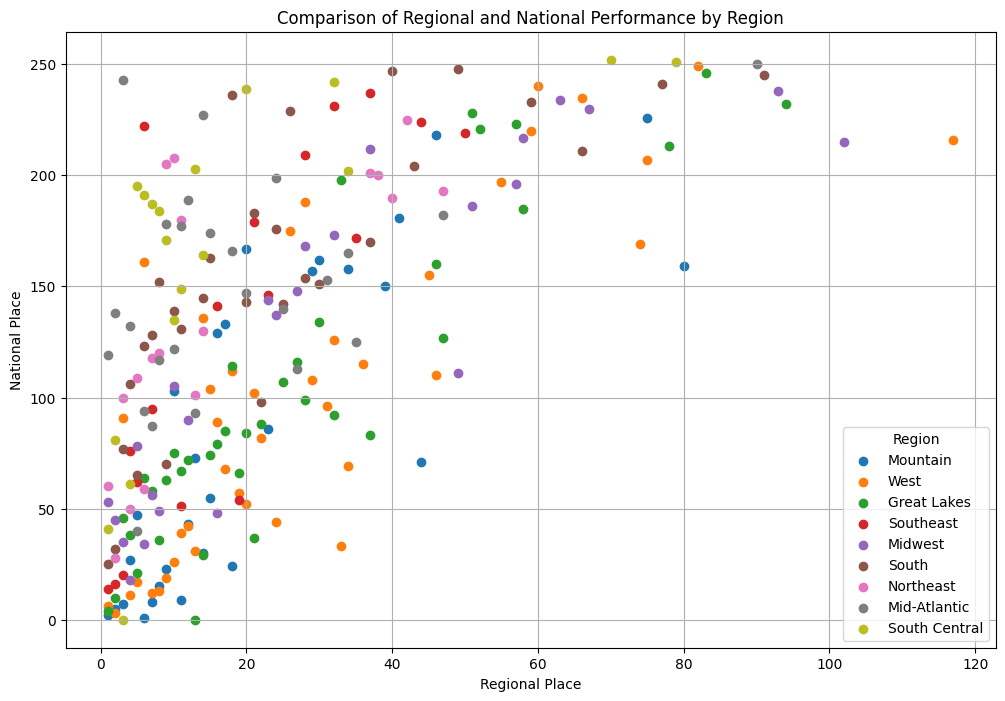

In [177]:
import matplotlib.pyplot as plt

regions = df['region'].unique()
color_map = {region: color for region, color in zip(regions, plt.get_cmap('tab10').colors)}
filtered_df = df
filtered_df.dropna(subset=['ncaaPlace', 'regionPlace'], inplace=True)
filtered_df = filtered_df[filtered_df['ncaaPlace'] != 'DNF']
print(filtered_df.shape[0])

# Plotting
plt.figure(figsize=(12, 8))
for region in regions:
    subset = filtered_df[filtered_df['region'] == region]
    plt.scatter(subset['regionPlace'], subset['ncaaPlace'], label=region, color=color_map[region])

plt.xlabel('Regional Place')
plt.ylabel('National Place')
plt.title('Comparison of Regional and National Performance by Region')
plt.legend(title='Region')
plt.grid(True)
plt.show()